In [1]:
# %matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
import os
import csv
from resources.conv_learner import *

# required to get individual channels out of image object
from PIL import Image, ImageSequence

### Create labels csv:

Ensure files are labeled according to: "Cell-line-Id + Experiment_ID + _00x.nd2"<br>
Note the Cell-line-Id has '-' delimiters, while all other name-fields have '_' delimiters!

In [54]:
# make csv from images in folder

def csv_from_dir(path, folder, labels_dict, outfile):
    _fnames = read_dir(path, folder)
    
    fnames = [[os.path.basename(ims).split('.')[0], # get image basename
                               labels_dict[os.path.basename(ims).split('_')[0]] # get label from labels_dict                              
                              ] for ims in _fnames]
    
    fnames_df = pd.DataFrame(fnames, columns=['Id', 'Targets'])
    uni_fnames = fnames_df.drop_duplicates('Id'); # only unique fnames
    
    print(f'Total unique files: {len(uni_fnames)}')
    return uni_fnames

In [55]:
### manually define labels:
labels = {'NM17-002': 0,
         'Ctrl-AK': 0,
         'GUK1-D': 1, 
         'GUK1-R': 1,
         'MFN2-1': 2,
         'VCP-1': 3}

### Define other arguments:
path = 'datasets/Hirano3D/'
folder = '2019-1-19_Hirano3D_02'
outfile = 'Hirano3D_train_02.csv'

In [56]:
# run function:
Hirano3D_df = csv_from_dir(path, folder, labels, outfile)

Total unique files: 461


In [58]:
### save to csv
Hirano3D_df.to_csv(path + 'Hirano3D_v1.csv', index=False)

In [61]:
### Image checking:
import skimage.external.tifffile as tiff

In [63]:
im = tiff.imread(path + 'test_zproject/' +'GUK1-R_064.tif')
im.shape

(4, 512, 512)

C:\Anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x177ab3a6c18>)

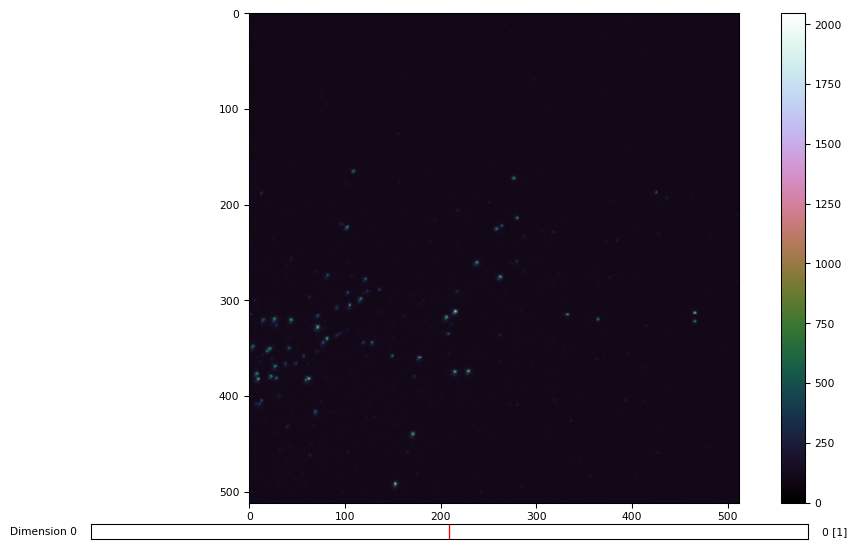

In [81]:
tiff.imshow(im[0])